# **COVID19 Tweets Cleaning and EDA** <br>
TeYang Lau<br>
Created: 5/6/2020<br>
Last update: 5/6/2020<br>

<img src = './Pictures/twitter.jpg'>

## This is the notebook where I cleaned the tweets data to ensure that the tweets are clear of unnucessary characters and symbols that are ready for sentiment analysis. ##


### What's in this notebook:
1. [Data Loading and Basic Cleaning](#Data_loading)
2. [Exploratory Data Analysis](#EDA)<br>
    2.1. [Tweet Length](#length)<br>
    2.2. [Most Common Stopwords](#Stopwords)<br>
    2.3. [Most Common Punctuations](#Punctuations)<br>
    2.4. [Most Common Words](#Words)<br>
    2.5. [Most Common Hashtags](#Hashtags)<br>    
3. [Advanced Cleaning](#Cleaning)
4. [Sentiment Analysis](#Sentiment)<br>


<a id='Data_loading'></a>
## 1. Data Loading and Basic Cleaning

In [94]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import numpy as np
from PIL import Image
import gc

In [95]:
tweets = pd.DataFrame() # initialize dataframe

listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk('./Data/'):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]
for f in listOfFiles:
    temp = pd.read_csv(f)
    tweets = tweets.append(temp, ignore_index=True)

In [96]:
tweets['Date'] = [pd.to_datetime(dt.strptime(t, '%Y-%m-%d %H:%M:%S%z').date()) for t in tweets['Datetime']]
tweets = tweets.sort_values('Datetime')
tweets['Datetime'] = pd.to_datetime(tweets['Datetime'])
tweets.columns = ['datetime', 'text', 'tweetid', 'username', 'geo', 'date']

# remove duplicates
tweets = tweets.drop_duplicates('tweetid').reset_index(drop=True).sort_values('datetime')
# remove NaN from tweets
tweets = tweets[tweets.text.notnull()]

In [97]:
tweets.head(10)

,datetime,text,tweetid,username,geo,date
0,2020-02-08 13:22:03+00:00,How wonderful a bus ride like this? #socialdis...,1226134097237442565,frogprince66,NaN,2020-02-08
1,2020-02-16 13:35:35+00:00,"drinks stall uncle: “teh o ping kosong, $1.90....",1229036602514493441,yijunian,NaN,2020-02-16
2,2020-02-22 00:12:28+00:00,Stranded Film Crew Made A Chilling Short Docu ...,1231008820815486976,ManishSharma_au,NaN,2020-02-22
3,2020-02-22 01:03:55+00:00,In Singapore there is always a song! A song de...,1231021769579843584,AliIsBk1,NaN,2020-02-22
4,2020-02-22 01:15:29+00:00,Networking invites in APAC: 👋 Hope the coronav...,1231024680506556416,elbuenob,NaN,2020-02-22
5,2020-02-22 03:16:57+00:00,Hi @weareoneEXO please take car of your self c...,1231055248376004608,SiriusStarss,NaN,2020-02-22
6,2020-02-22 03:20:11+00:00,Bruce got the corona virus,1231056061475409925,SirDankThe2nd,NaN,2020-02-22
7,2020-02-22 03:55:27+00:00,Charity Shield Match Day. We take on @hougangu...,1231064935175770112,madhumacintosh,NaN,2020-02-22
8,2020-02-22 03:56:23+00:00,"West yr mask,check yr temperature all the time...",1231065171004575746,_Angie_62,NaN,2020-02-22
9,2020-02-22 04:01:42+00:00,"Sometimes it’s not the people who change, it’s...",1231066508836474885,SyedHarun_,NaN,2020-02-22


<a id='EDA'></a>
## 2. Exploratory Data Analysis

<a id='Length'></a>
### **2.1. Tweet Length** ###

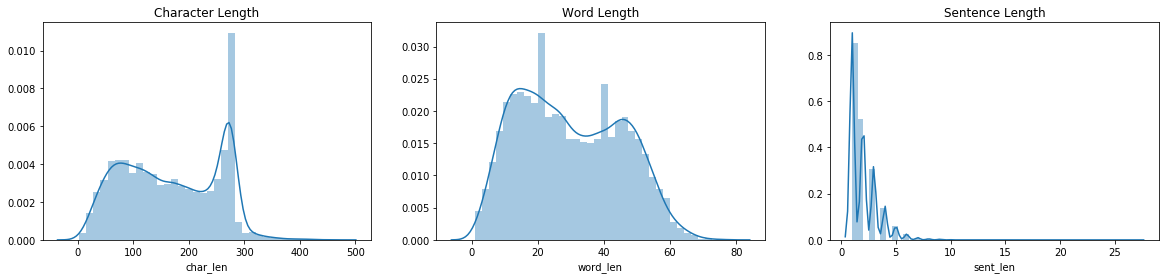

In [98]:
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
tweets['char_len'] = tweets.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in tweets.text]
tweets['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in tweets.text]
tweets['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(tweets[plot_cols[i]]).set_title(plot_titles[i])

In [99]:
tweets[tweets.sent_len > 7]
tweets[tweets.word_len > 50]

,datetime,text,tweetid,username,geo,date,char_len,word_len,sent_len
8,2020-02-22 03:56:23+00:00,"West yr mask,check yr temperature all the time...",1231065171004575746,_Angie_62,NaN,2020-02-22,271,57,3
15,2020-02-22 07:38:47+00:00,so just read an article that states how north ...,1231121141403508736,aksyahmi,NaN,2020-02-22,258,51,3
32,2020-02-22 16:59:05+00:00,"Given the current #COVID19 situation, BCP is i...",1231262143002996737,henryee,NaN,2020-02-22,283,55,2
40,2020-02-23 03:23:35+00:00,Sister: this week till nextweek is a critical ...,1231419305264173056,iimikay,NaN,2020-02-23,274,67,3
44,2020-02-23 05:30:12+00:00,"That’s sad, tbh these Chinese tourists don’t n...",1231451168691220481,solomusafir,NaN,2020-02-23,280,67,3
...,...,...,...,...,...,...,...,...,...
15833,2020-05-31 19:18:45+00:00,Ok one last time guys. #covid19 is a NEW virus...,1267173689319030785,theoldlee,NaN,2020-05-31,257,63,5
15849,2020-05-31 21:07:03+00:00,Economic output may be down in the first quart...,1267200943562489857,iskonglasalista,NaN,2020-05-31,331,51,2
15858,2020-05-31 21:39:58+00:00,Repost @naochanbeat . 楽 し い 曲 に サ ル サ シ ャ イ ン ...,1267209230039334918,vmworldwide,NaN,2020-05-31,274,56,7
15871,2020-05-31 22:40:53+00:00,no racism in singapore?! are u fucking kidding...,1267224560354553857,wolfbunnies,NaN,2020-05-31,255,56,5


<a id='Stopwords'></a>
### **2.2. Most Common Stopwords** ###

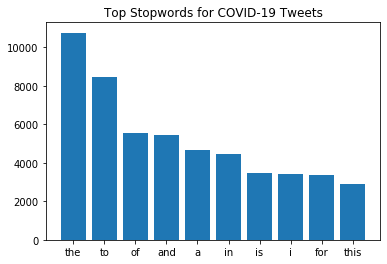

In [100]:
## Plot most common stopwords

#nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe 
corpus = [] 
[corpus.append(word.lower()) for tweet in tweets.text for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x,y = count_top_stopwords(corpus)

# Plot bar plot of top stopwords for each class
plt.bar(x,y)
plt.title('Top Stopwords for COVID-19 Tweets')
plt.show()


<a id='Punctuations'></a>
### **2.3. Most Common Punctuations** ###

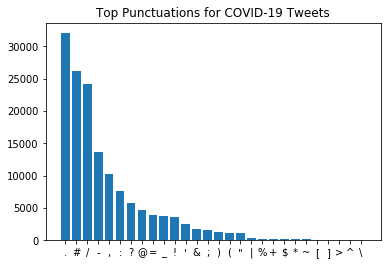

In [101]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe 
corpus = [] 
[corpus.append(c) for tweet in tweets.text for c in tweet]
corpus = list(filter(lambda x: x in punctuation, corpus)) # use filter to select only punctuations

from collections import Counter
x,y = zip(*Counter(corpus).most_common())

# Plot bar plot of top punctuations for each class
plt.bar(x,y)
plt.title('Top Punctuations for COVID-19 Tweets')
plt.show()

<a id='Words'></a>
### **2.4. Most Common Words** ###

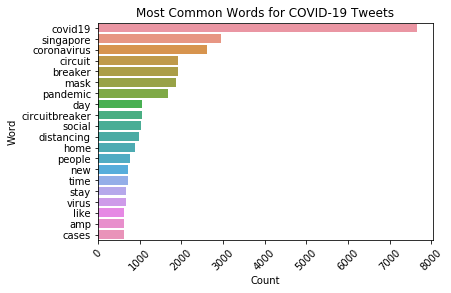

In [102]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe
# - remove url, tokenize tweet into words, lowercase words
corpus = [] 
[corpus.append(word.lower()) for tweet in tweets.text for word in word_tokenize(remove_url(tweet))]
corpus = list(filter(lambda x: x not in stop, corpus)) # use filter to unselect stopwords


# Create df for word counts to use sns plots
a = Counter(corpus).most_common()
df = pd.DataFrame(a, columns=['Word','Count'])

# Plot 
sns.barplot(x='Count',y='Word',data=df.head(20)).set_title('Most Common Words for COVID-19 Tweets')
plt.xticks(rotation=45)
plt.show()


<a id='Hashtags'></a>
### **2.5. Most Common Hashtags** ###

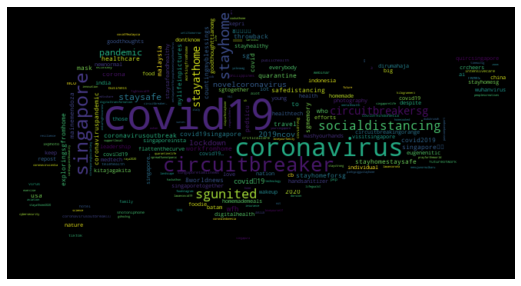

In [103]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in tweets.text for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    hashtag = hashtag.split()

    hashtag_d_dict = {}
    for ht in hashtag:
        if ht in hashtag_d_dict:
            hashtag_d_dict[ht] += 1
        else:
            hashtag_d_dict[ht] = 1

    sg_mask = np.array(Image.open("./Pictures/singaporemap.png"))
    my_cloud = WordCloud(background_color='black', stopwords=stop, mask=sg_mask).generate_from_frequencies(hashtag_d_dict)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

    return hashtag_d_dict

plt.figure(figsize=(20,15))
ht_dict = wc_hash(0)


<a id='Cleaning'></a>
## 3. Advanced Cleaning

In [104]:

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

tweets.text = [decontraction(tweet) for tweet in tweets.text]

#############################################################################################################################
## Remove Hashtags and Mentions
# def remove_hashtags(text):
#     text = re.sub(r" #(\w+)", '', text, flags=re.MULTILINE)
#     text = re.sub(r" @(\w+)", '', text, flags=re.MULTILINE)
#     return text

# tweets.text = [remove_hashtags(tweet) for tweet in tweets.text]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

tweets.text = tweets.text.apply(lambda x: remove_emoji(x))

OMG there is a volcano eruption!!! 


In [105]:
#############################################################################################################################
## Remove URLs
tweets.text = tweets.text.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

tweets.text = tweets.text.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

tweets.text = tweets.text.apply(lambda x: replace_amp(x))

#############################################################################################################################
## Segment words from hashtag
def segment_words(text):
    text = ' '.join(segment(text))
    return text

tweets.text = tweets.text.apply(lambda x: segment_words(x))

In [106]:
tweets.text

0        how wonderful a bus ride like this social dist...
1        drinks stall uncle te hoping kosong 190wahyout...
2        stranded film crew made a chilling short docu ...
3        in singapore there is always a song a song ded...
4        networking invites in apac hope the coronaviru...
                               ...                        
15891    sigh boarding the train at this hour with peop...
15892    pakai mask t idurterngangapunorangtak kisah ha...
15893    bt exclusive gold is appeal rises as coronavir...
15894    good morning its the last day of circuit break...
15895    circuit breaker lockdown 2020 meditation promises
Name: text, Length: 15895, dtype: object

<a id='Sentiment'></a>
## 4. Sentiment Analysis

In [107]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment = pd.DataFrame()
for tweet in tweets.text:
    sent=analyser.polarity_scores(tweet)
    sentiment=sentiment.append(sent, ignore_index=True)

tweets = pd.concat([tweets, sentiment], axis=1)

In [115]:
tweets.to_csv('./Data/cleanedTweets.csv', index=False)